## Problem statement

The client being a property investor is looking to acquire properties in King County area. 
The client wanted to understand the house prices for those houses for which price is not listed with the help of the houses for which selling prices are listed.

### Objective

Build a model that predicts a housing price with the given set of datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import os

In [9]:
data_loc = input('Enter the location of data: ')

Enter the location of data: C:\Users\91809\Desktop\Praxis\MachineLearning\4_Data\HousingData


In [10]:
house_train_data = pd.read_csv(os.path.join(data_loc,'wk3_kc_house_train_data.csv'))

In [11]:
house_train_data.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5970,3782100155,20140527T000000,255000.0,3,1.00,960,8100,1.0,0,0,...,7,960,0,1955,0,98155,47.7766,-122.307,1120,8100
1366,2188200785,20140912T000000,196000.0,3,1.00,880,19600,1.0,0,0,...,7,880,0,1978,0,98023,47.2707,-122.340,880,10500
2775,3261000080,20150310T000000,704111.0,4,2.75,2460,9520,1.0,0,1,...,8,1680,780,1976,0,98034,47.7021,-122.233,2380,9600
6943,705730280,20140819T000000,325000.0,3,2.50,1740,5267,2.0,0,0,...,7,1740,0,1999,0,98038,47.3777,-122.023,2180,5000
4114,1523069096,20140811T000000,459900.0,3,1.75,2340,51836,1.5,0,0,...,8,1510,830,1978,0,98027,47.4846,-122.035,2060,77536
2748,3179102155,20150108T000000,760000.0,4,3.50,3000,5300,1.0,0,0,...,7,1780,1220,1949,0,98115,47.6748,-122.279,1360,5450
3568,8732130580,20150430T000000,280000.0,3,1.75,1740,8625,1.0,0,0,...,7,1240,500,1978,0,98023,47.3054,-122.380,1980,8625
7393,2212200050,20141028T000000,255000.0,4,1.75,1650,7200,1.0,0,0,...,7,1100,550,1977,0,98031,47.3944,-122.187,1620,7374
1640,6385900090,20141103T000000,277500.0,4,2.25,1660,7184,1.0,0,0,...,7,1110,550,1963,0,98188,47.4678,-122.294,1640,7200
2804,1623800440,20150417T000000,499922.0,3,2.00,1460,3000,1.0,0,0,...,7,940,520,1990,0,98117,47.6820,-122.365,1460,3000


### Missing Data and Datatypes of attributes in training data

In [13]:
house_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9761 non-null   int64  
 1   date           9761 non-null   object 
 2   price          9761 non-null   float64
 3   bedrooms       9761 non-null   int64  
 4   bathrooms      9761 non-null   float64
 5   sqft_living    9761 non-null   int64  
 6   sqft_lot       9761 non-null   int64  
 7   floors         9761 non-null   float64
 8   waterfront     9761 non-null   int64  
 9   view           9761 non-null   int64  
 10  condition      9761 non-null   int64  
 11  grade          9761 non-null   int64  
 12  sqft_above     9761 non-null   int64  
 13  sqft_basement  9761 non-null   int64  
 14  yr_built       9761 non-null   int64  
 15  yr_renovated   9761 non-null   int64  
 16  zipcode        9761 non-null   int64  
 17  lat            9761 non-null   float64
 18  long    

######  From the extract of info() method:
<ul>
    <li> There are no missing values </li>
    <li> Data type of the date attribute needs to be converted into datatime type</li>
    
</ul>

In [14]:
print('Housing Training Data has {} columns and {} rows '.format(house_train_data.shape[1],house_train_data.shape[0]))

Housing Training Data has 21 columns and 9761 rows 


In [15]:
house_train_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Data Exploration

### Univariate Analysis and Attribute Understanding

### Attribute name:  id

In [16]:
house_train_data['id'].count()

9761

In [17]:
id_data = pd.crosstab(house_train_data['id'], columns='counts')
repeat_ids = id_data[id_data['counts'] > 1]
repeat_ids = repeat_ids.reset_index()
repeat_ids.shape

(40, 2)

<b> Attribute Description:</b> id is supposed to be a number that should be able to address each row elements uniquely. <br>
<b> Scale of Measure:</b> Nominal Scale <br>
<b> Observation: </b> 
        <div> There are 40 records having duplicate id values (i.e) a total of 80. Each data is having two duplicates as per the training data. Only difference amoung the data are with date and price attributes.</div>
        <div> So, the record with the lastest date could only be considered for training the data. </div> 
        
(Note: As per the training data each duplicates are repeated only twice, but generic code for selecting the record with the latest date is recommended)

### Attribute name: price

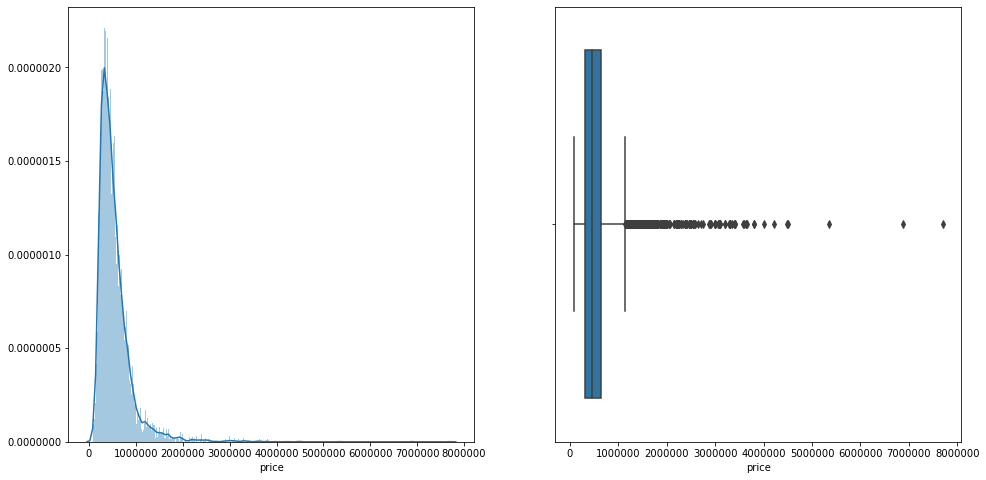

In [18]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
sns.distplot(house_train_data['price'],bins = 500, ax = ax[0])
sns.boxplot(house_train_data['price'], ax = ax[1])
plt.show()

In [112]:
q1 = house_train_data['price'].quantile(0.25)
q3 = house_train_data['price'].quantile(0.75)
IQR = q3 - q1
lower_whisker = q1 - 1.5* IQR
upper_whisker = q3 + 1.5* IQR
upper_whisker
priceOutliers = house_train_data[(house_train_data['price'] < lower_whisker) | (house_train_data['price'] > upper_whisker)]
outlierProportion = priceOutliers['price'].count()/house_train_data.shape[0]
print('{} % of of Price data are outliers'.format(round(outlierProportion*100)))

5.0 % of of Price data are outliers


<b> Attribute Description:</b> It is a Target Variable. It represents the price of the house. Unit uknown <br>
<b> Scale Of Measure:</b> Ratio scale <br>
<b> Observation: </b> 
        Since our target variable is ratio scale, regression techniques can be preffered for training the data

### Attribute name: bedrooms

In [13]:
q1 = house_train_data['bedrooms'].quantile(0.25)
q3 = house_train_data['bedrooms'].quantile(0.75)
IQR = q3 - q1
lower_whisker = q1 - 1.5* IQR
upper_whisker = q3 + 1.5* IQR
bedroomOutliers = house_train_data[(house_train_data['bedrooms'] < lower_whisker) | (house_train_data['bedrooms'] > upper_whisker)]['bedrooms'].unique()
print("No of beds outliers",bedroomOutliers)

No of beds outliers [ 6  1  7  8  9  0 11 10 33]


Percentage of no of bedrooms in training data

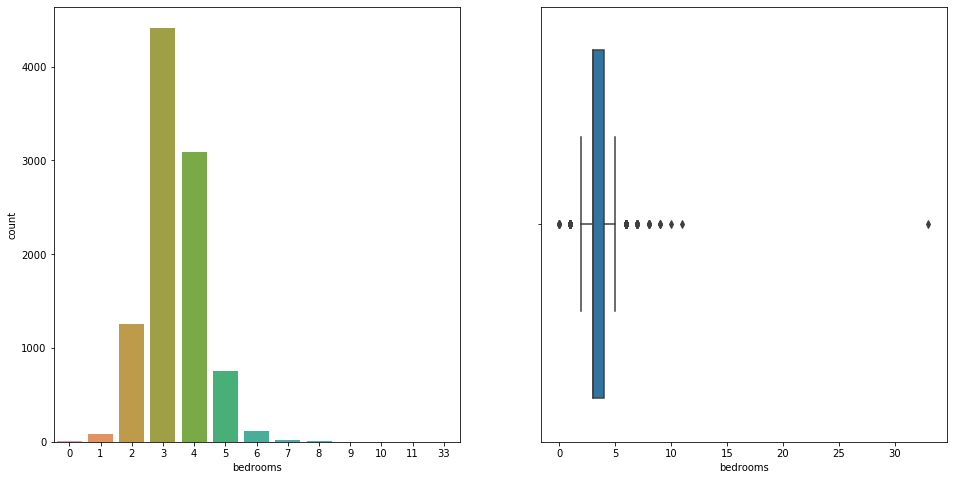

In [114]:
bedroomCount = house_train_data['bedrooms'].value_counts().reset_index().rename(columns={'index':'bedrooms','bedrooms':'count'})
fig, ax = plt.subplots(1,2, figsize=(16,8))
sns.barplot(x='bedrooms', y='count', data = bedroomCount, ax=ax[0])
sns.boxplot(house_train_data['bedrooms'])

<b> Attribute Description:</b> Bedrooms - Represents the number of bedrooms <br>
<b> Scale of Measure:</b> Ordinal Scale <br>
<b> Observation: </b> 
        <div>
        1) As per outlier analysis 6,1,7,8,9,0,11,10,33 are considered to be outliers. But considering them as outliers would not be ideal. 
        </div>
        <div>
        2) As per the percentage of no. of number of bedrooms available, percentages less 0.05 could be considered as outliers. (i,e) 9, 10, 11, 33
        </div>

### Attribute name: bathrooms

In [16]:
house_train_data['bathrooms'].value_counts().head(10)

2.50    2409
1.00    1741
1.75    1431
2.25     937
2.00     871
1.50     599
2.75     525
3.50     339
3.00     335
3.25     274
Name: bathrooms, dtype: int64

In [56]:
q1 = house_train_data['bathrooms'].quantile(0.25)
q3 = house_train_data['bathrooms'].quantile(0.75)
IQR = q3 - q1
lower_whisker = q1 - 1.5* IQR
upper_whisker = q3 + 1.5* IQR
bathroomsOutliers = house_train_data[(house_train_data['bathrooms'] < lower_whisker) | (house_train_data['bathrooms'] > upper_whisker)]
print("No of bathrooms outliers",bathroomsOutliers['bathrooms'].unique())

No of bathrooms outliers [4.5  4.   4.75 5.   4.25 3.75 5.5  5.75 0.   8.   7.5  7.75 6.   5.25
 6.25 6.5 ]


In [62]:
percentOfOutliers = bathroomsOutliers['bathrooms'].count()/house_train_data.shape[0] *100
print("{} % of bathroom data are outliers".format(round(percentOfOutliers)))

3.0 % of bathroom data are outliers


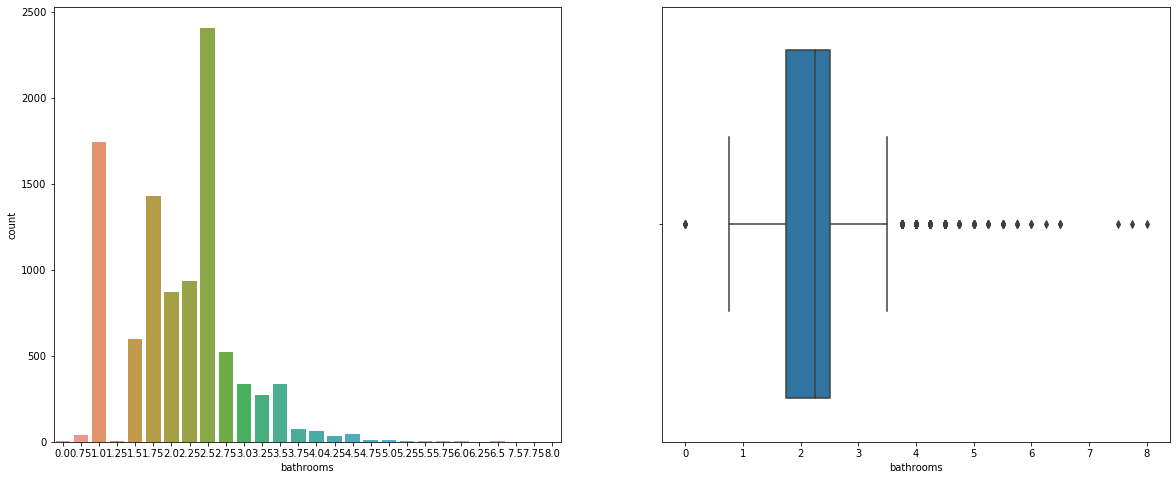

In [108]:
bathroomCount = house_train_data['bathrooms'].value_counts().reset_index().rename(columns={'index':'bathrooms','bathrooms':'count'})
fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.barplot(x='bathrooms', y='count', data = bathroomCount, ax=ax[0])
sns.boxplot(house_train_data['bathrooms'])

<b> Attribute Description:</b> bathrooms - Represents the number of bathrooms <br>
<b> Scale of Measure:</b> Ordinal Scale <br>
<b> Observation: </b> 
        <div>
        1) As per outlier analysis  0, 3.75, 4, 4.25, 4.5, 4.75, 5, 5.25, 5.5  5.75, 6, 6.25, 6.5, 7.5, 7.75, 8 are considered to be outliers. But considering them as outliers would not be ideal. 
        </div>
        <div>
        2) As per the percentage of no. of number of bedrooms available, 3% could be considered as outliers. 
        </div>

### Attribute name: sqft_living

In [18]:
house_train_data['sqft_living'].describe()

count     9761.000000
mean      2086.734146
std        927.194303
min        290.000000
25%       1420.000000
50%       1910.000000
75%       2570.000000
max      12050.000000
Name: sqft_living, dtype: float64

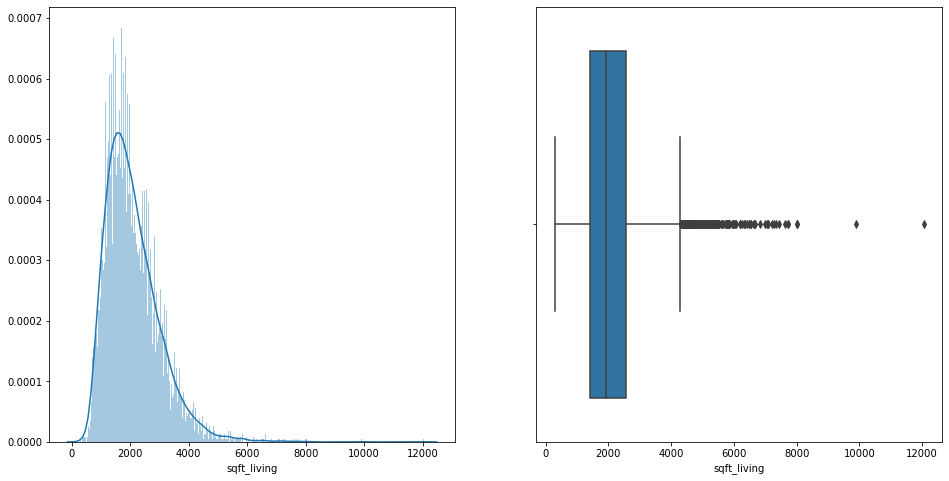

In [63]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
sns.distplot(house_train_data['sqft_living'],bins = 500, ax = ax[0])
sns.boxplot(house_train_data['sqft_living'], ax = ax[1])
plt.show()

In [20]:
#Percentages of outliers
q1 = house_train_data['sqft_living'].quantile(0.25)
q3 = house_train_data['sqft_living'].quantile(0.75)
IQR = q3 - q1
lower_whisker = q1 - 1.5* IQR
upper_whisker = q3 + 1.5 * IQR
outlierVal = house_train_data[(house_train_data['sqft_living'] < lower_whisker) | (house_train_data['sqft_living'] > upper_whisker)]
percentage_of_outliers = outlierVal['bathrooms'].count()/house_train_data.shape[0] * 100
print('{}% of values in sqft_living are outliers'.format(round(percentage_of_outliers,3)))

2.459% of values in sqft_living are outliers


<b> Attribute Description:</b> sqft_living - Represents the area occupied by the building <br>
<b> Scale of Measure:</b> Ratio Scale <br>
<b> Observations: </b> 
        <div>
        There are about 2% of the data that are considered to be outliers. But on the exterior look, this attribute need not undergo an outlier treatment.
        </div>

### Attribute name: sqft_lot

In [22]:
house_train_data['sqft_lot'].describe()

count    9.761000e+03
mean     1.521526e+04
std      4.126673e+04
min      5.200000e+02
25%      5.100000e+03
50%      7.642000e+03
75%      1.066000e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

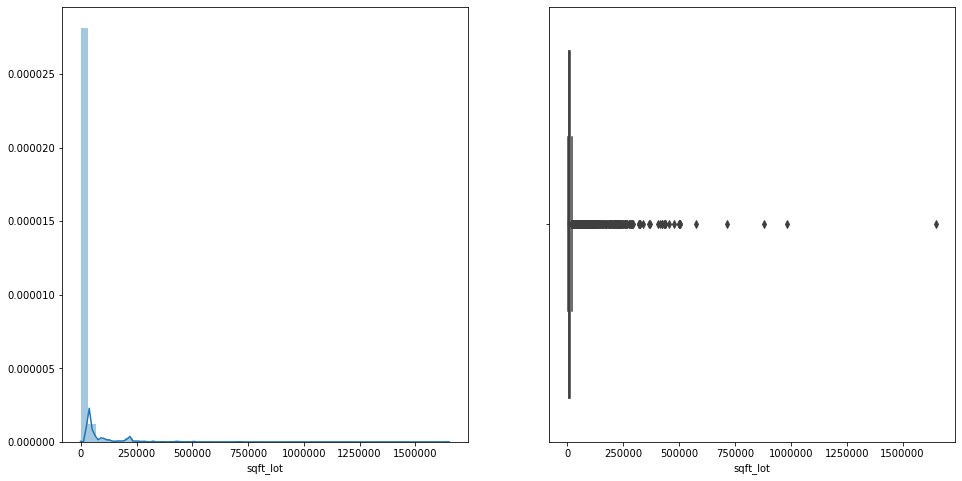

In [90]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
sns.distplot(house_train_data['sqft_lot'], ax = ax[0])
sns.boxplot(house_train_data['sqft_lot'], ax = ax[1])
plt.show()

In [24]:
#Percentages of outliers
q1 = house_train_data['sqft_lot'].quantile(0.25)
q3 = house_train_data['sqft_lot'].quantile(0.75)
IQR = q3 - q1
lower_whisker = q1 - 1.5* IQR
upper_whisker = q3 + 1.5 * IQR
outlierVal = house_train_data[(house_train_data['sqft_lot'] < lower_whisker) | (house_train_data['sqft_lot'] > upper_whisker)]
percentage_of_outliers = outlierVal['sqft_lot'].count()/house_train_data.shape[0] * 100
print('{}% of values in sqft_lot are outliers'.format(round(percentage_of_outliers,3)))

11.157% of values in sqft_lot are outliers


<b> Attribute Description:</b> sqft_lot - Represents the area in which the building is built <br>
<b> Scale of Measure:</b> Ratio Scale <br>
<b> Observations: </b> 
        <div>
        There are about 11% of the data that are considered to be outliers. But on the exterior look, this attribute need not undergo an outlier treatment.
        </div>

### Attribute name: floors

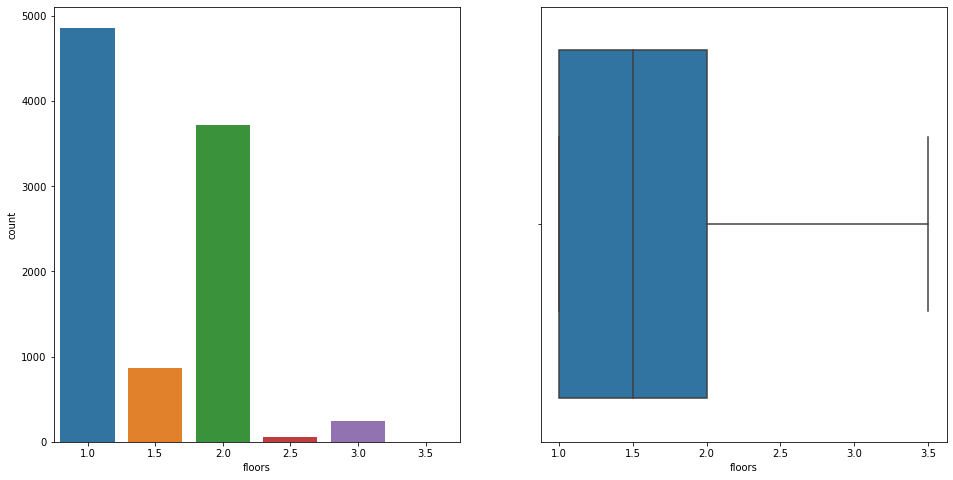

In [82]:
floorCount = house_train_data['floors'].value_counts().reset_index().rename(columns={'index':'floors','floors':'count'})
fig, ax = plt.subplots(1,2, figsize=(16,8))
sns.barplot(x='floors', y='count', data = floorCount, ax=ax[0])
sns.boxplot(house_train_data['floors'])

In [27]:
(house_train_data['floors'].value_counts()/house_train_data.shape[0])* 100

1.0    49.810470
2.0    38.141584
1.5     8.882287
3.0     2.509989
2.5     0.635181
3.5     0.020490
Name: floors, dtype: float64

<b> Attribute Description:</b> Floors - Represents the number of floors in a building <br>
<b> Scale of Measure:</b> Ordinal Scale <br>
<b> Observations: </b> 
        <div>
         It is a categorical variable. Might not require one hot encoding, as it is already a numerical. But the interpretation of such variable in linear regression could be inconclusive.
        </div>

### Attribute name: waterfront

In [29]:
house_train_data['waterfront'].value_counts()

0    9679
1      82
Name: waterfront, dtype: int64

In [71]:
house_train_data[house_train_data['waterfront'] == 1]['waterfront'].count()/house_train_data.shape[0] * 100

0.8400778608749104

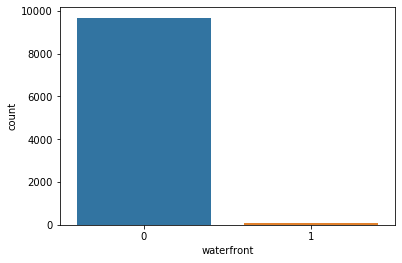

In [84]:
waterfrontCount = house_train_data['waterfront'].value_counts().reset_index().rename(columns={'index':'waterfront','waterfront':'count'})
sns.barplot(x='waterfront', y='count', data = waterfrontCount)

<b> Attribute Description:</b> waterfront - Says if the property has a waterfront <br>
<b> Scale of Measure:</b> Norminal Scale <br>
<b> Observations: </b> 
        <div>
        It is a binary variable where 1 denotes the presence of waterfront and 0 the absence of it. As per the training data there are only 0.84 of the property have waterfront.
        </div>

### Attribute name: view

In [32]:
house_train_data['view'].value_counts()

0    8748
2     454
3     243
1     160
4     156
Name: view, dtype: int64

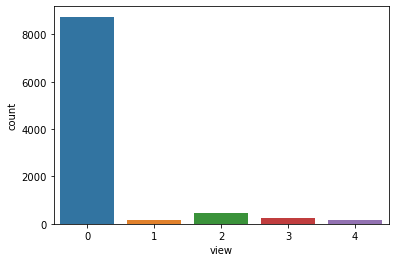

In [86]:
viewCount = house_train_data['view'].value_counts().reset_index().rename(columns={'index':'view','view':'count'})
sns.barplot(x='view', y='count', data = viewCount)

<b> Attribute Description:</b> view - Represents the numerical representation of how good view of the house. Number varies from 1 to 4(Assumption: 1 is poor view and 4 being the view is good) <br>
<b> Scale of Measure:</b> Ordinal <br>
<b> Observations: </b> 
        <div>
            1) Most of the house listed do not have a good view
        </div>
        <div>
            2) Its is already numberical, would not need one hot encoding for linear regression.
        </div>

### Attribute name: condition

In [34]:
np.sort(house_train_data['condition'].unique())

array([1, 2, 3, 4, 5], dtype=int64)

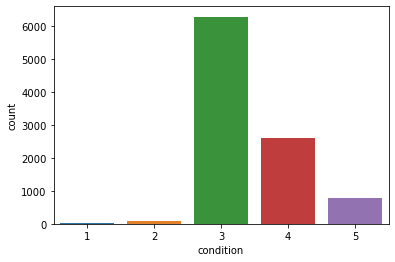

In [87]:
conditionCount = house_train_data['condition'].value_counts().reset_index().rename(columns={'index':'condition','condition':'count'})
sns.barplot(x='condition', y='count', data = conditionCount)

<b> Attribute Description:</b> Condition - Represents the condition of house. Number varies from 1 to 5(Assumption: 1 is the condition is very bad and 5 being the condition is very good) <br>
<b> Scale of Measure:</b> Ordinal <br>
<b> Observations: </b> 
        <div>
            1) Most of the house listed are list in condtion rating no 3 which could be understood as moderate condition.
        </div>
        <div>
            2) Its is already numberical, would not need one hot encoding for linear regression.
        </div>

### Attribute name: grade

In [37]:
np.sort(house_train_data['grade'].unique())

array([ 1,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int64)

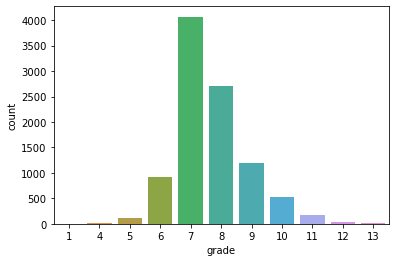

In [88]:
gradeCount = house_train_data['grade'].value_counts().reset_index().rename(columns={'index':'grade','grade':'count'})
sns.barplot(x='grade', y='count', data = gradeCount)

<b> Attribute Description:</b> grade - Numberical grade varying from 1 to 13(Assumption: Increase in graded number means increase in the quality) <br>
<b> Scale of Measure:</b> Ordinal <br>
<b> Observations: </b>
        <div>
           1) Most of the grade appear between 6 to 10.
        <div>
        <div>
            2) Its is already numberical, would not need one hot encoding for linear regression.
        </div>

### Attribute name: sqft_above

In [40]:
house_train_data['sqft_above'].describe()

count    9761.000000
mean     1793.291159
std       835.763817
min       290.000000
25%      1190.000000
50%      1570.000000
75%      2230.000000
max      8860.000000
Name: sqft_above, dtype: float64

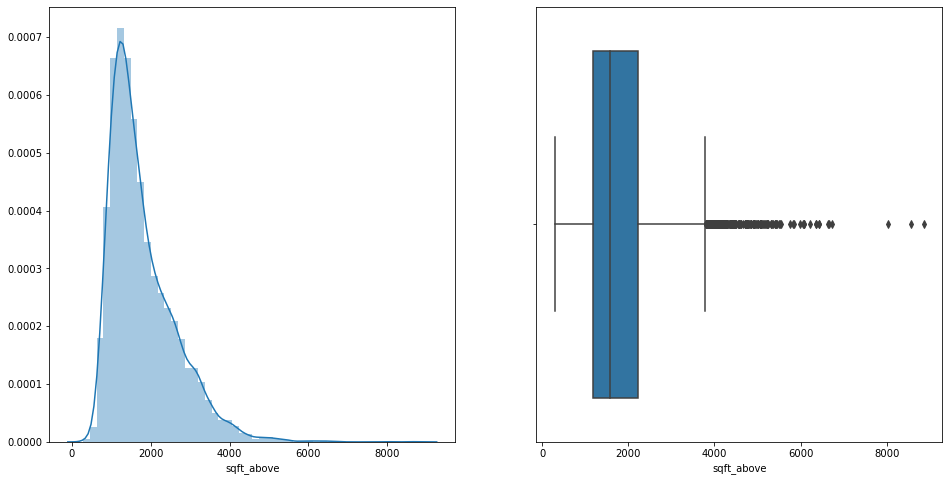

In [89]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
sns.distplot(house_train_data['sqft_above'], ax = ax[0])
sns.boxplot(house_train_data['sqft_above'], ax = ax[1])
plt.show()

In [42]:
#Percentages of outliers
q1 = house_train_data['sqft_above'].quantile(0.25)
q3 = house_train_data['sqft_above'].quantile(0.75)
IQR = q3 - q1
lower_whisker = q1 - 1.5* IQR
upper_whisker = q3 + 1.5 * IQR
outlierVal = house_train_data[(house_train_data['sqft_above'] < lower_whisker) | (house_train_data['sqft_above'] > upper_whisker)]
percentage_of_outliers = outlierVal['sqft_above'].count()/house_train_data.shape[0] * 100
print('{}% of values in sqft_above are outliers'.format(round(percentage_of_outliers,3)))

2.735% of values in sqft_above are outliers


<b> Attribute Description:</b> sqft_above - Represents the area of the building that are not inclusive of basement <br>
<b> Scale of Measure:</b> Ratio Scale <br>
<b> Observations: </b> 
        <div>
        1) There are about 2.7% of the data that are considered to be outliers. But on the exterior look, this attribute need not undergo an outlier treatment.
        </div>
        <div>
        2) This variable can be avoided as sqft_living is the sum of sqft_above + sqft_basement
        </div>

### Attribute name: sqft_basement

In [44]:
house_train_data['sqft_basement'].describe()

count    9761.000000
mean      293.442987
std       442.612722
min         0.000000
25%         0.000000
50%         0.000000
75%       570.000000
max      3480.000000
Name: sqft_basement, dtype: float64

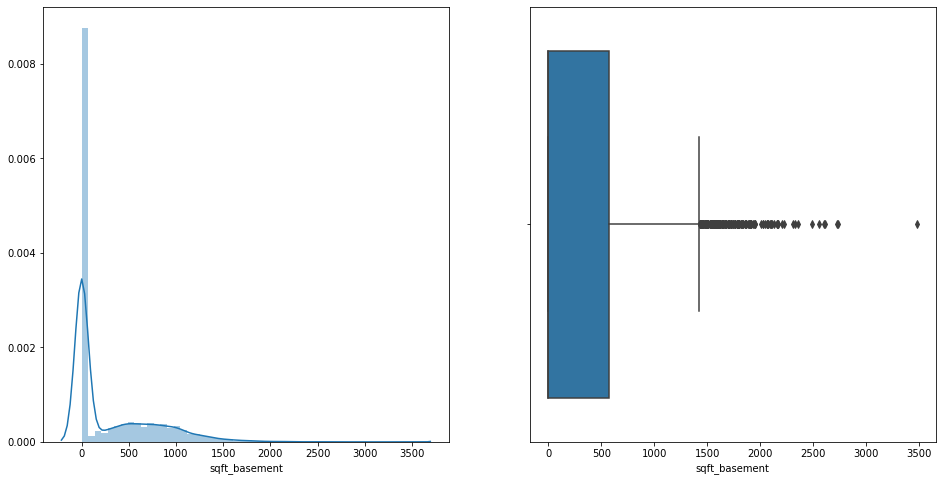

In [91]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
sns.distplot(house_train_data['sqft_basement'], ax = ax[0])
sns.boxplot(house_train_data['sqft_basement'], ax = ax[1])
plt.show()

In [46]:
#Percentages of outliers
q1 = house_train_data['sqft_basement'].quantile(0.25)
q3 = house_train_data['sqft_basement'].quantile(0.75)
IQR = q3 - q1
lower_whisker = q1 - 1.5* IQR
upper_whisker = q3 + 1.5 * IQR
outlierVal = house_train_data[(house_train_data['sqft_basement'] < lower_whisker) | (house_train_data['sqft_basement'] > upper_whisker)]
percentage_of_outliers = outlierVal['sqft_basement'].count()/house_train_data.shape[0] * 100
print('{}% of values in sqft_basement are outliers'.format(round(percentage_of_outliers,3)))

2.151% of values in sqft_basement are outliers


<b> Attribute Description:</b> sqft_basement - Represents the area of the building that are not inclusive of basement <br>
<b> Scale of Measure:</b> Ratio Scale <br>
<b> Observations: </b> 
        <div>
        1) There are about 2.7% of the data that are considered to be outliers. But on the exterior look, this attribute need not undergo an outlier treatment.
        </div>
        <div>
        2) This variable can be avoided as sqft_living is the sum of sqft_above + sqft_basement
        </div>
        <div>
        3) Another binary variable can be constructed based on if the basement is present or not. 1 for basement present and in case of 0 basement is not there.
        </div>


### Attribute name: yr_built

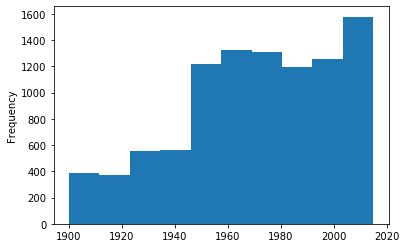

In [48]:
house_train_data['yr_built'].plot(kind='hist');

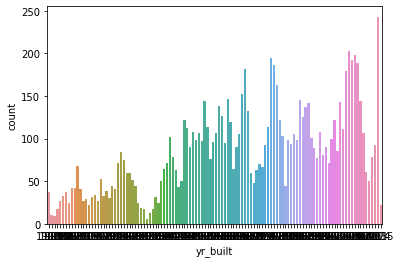

In [101]:
yr_built_count = house_train_data['yr_built'].value_counts().reset_index().rename(columns={'index':'yr_built','yr_built':'count'})
sns.barplot(x='yr_built', y='count', data=yr_built_count)


<b> Attribute Description:</b> yr_built - Year in which the building was built <br>
<b> Scale of Measure:</b> Interval Scale <br>
<b> Observations: </b> 
        <div>
        1) The number of building built increases with time.
        </div>
        <div>
        2) Its the year in which the building was built. Not exactly sure of how this could be used in regression. But this could provide us with another continious column of age of the building which could definitely be used in regression.
        </div>

### Attribute name: yr_renovated 

In [50]:
house_train_data[house_train_data['yr_renovated'] != 0]['yr_renovated'].count()/house_train_data.shape[0] * 100

4.313082675955333

<b> Attribute Description:</b> yr_renovated - Year in which the buildings are renovated <br>
<b> Scale of Measure:</b> Interval Scale <br>
<b> Observations: </b> 
        <div>
        1) The attribute has renovated year values to be an year or 0. 0 represents there were no renovations on the building.
        </div>
        <div>
        2) Only 4% of the building are renovated.
        </div>
        <div>
        3) Not entirely sure how this attribute could contribute for my regression model. But a binay attribute can be created with yes/no for if_renovated.
        </div>


### Attribute name: zipcode

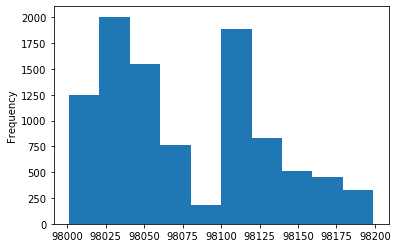

In [52]:
house_train_data['zipcode'].plot(kind='hist');

In [53]:
print('Total no. of zip code available are {}'.format(house_train_data['zipcode'].value_counts().count()))

Total no. of zip code available are 70


<b> Attribute Description:</b> zipcode <br>
<b> Scale of Measure:</b> Nominal Scale <br>
<b> Observations: </b> 
        <div>
         One hot coding is required for this data for it to be applied in linear regression
        </div>

### Attribute name: lat 

### Attribute name: long 

### Attribute name: sqft_living15

In [57]:
house_train_data['sqft_living15'].describe()

count    9761.000000
mean     1992.359697
std       687.322247
min       620.000000
25%      1490.000000
50%      1840.000000
75%      2370.000000
max      5790.000000
Name: sqft_living15, dtype: float64

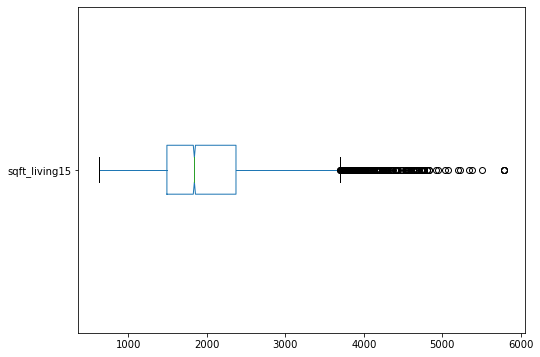

In [58]:
house_train_data.boxplot(column='sqft_living15', vert= False,grid = False, notch = True, figsize = (8,6));

In [59]:
q1 = house_train_data['sqft_living15'].quantile(0.25)
q3 = house_train_data['sqft_living15'].quantile(0.75)
IQR = q3 - q1
lower_whisker = q1 - 1.5* IQR
upper_whisker = q3 + 1.5 * IQR
outlierVal = house_train_data[(house_train_data['sqft_living15'] < lower_whisker) | (house_train_data['sqft_living15'] > upper_whisker)]
percentage_of_outliers = outlierVal['sqft_living15'].count()/house_train_data.shape[0] * 100
print('{}% of values in sqft_living15 are outliers'.format(round(percentage_of_outliers,3)))

2.428% of values in sqft_living15 are outliers


<b> Attribute Description:</b> sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors <br>
<b> Scale of Measure:</b> Ratio Scale <br>
<b> Observations: </b> 
        <div>
        There are about 2% of the data that are considered to be outliers. But on the exterior look, this attribute need not undergo an outlier treatment.
        </div>

### Attribute name: sqft_lot15

In [61]:
house_train_data['sqft_lot15'].describe()

count      9761.000000
mean      12824.785165
std       26518.337402
min         660.000000
25%        5160.000000
50%        7660.000000
75%       10113.000000
max      560617.000000
Name: sqft_lot15, dtype: float64

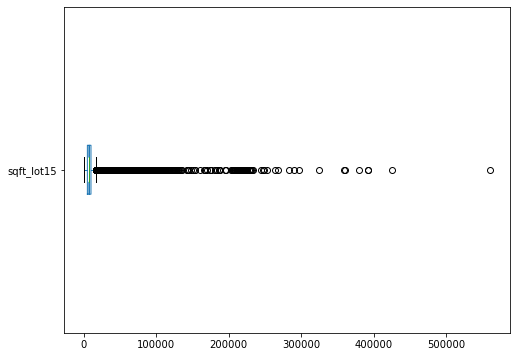

In [62]:
house_train_data.boxplot(column='sqft_lot15', vert= False,grid = False, notch = True, figsize = (8,6));

In [63]:
#Percentages of outliers
q1 = house_train_data['sqft_lot15'].quantile(0.25)
q3 = house_train_data['sqft_lot15'].quantile(0.75)
IQR = q3 - q1
lower_whisker = q1 - 1.5* IQR
upper_whisker = q3 + 1.5 * IQR
outlierVal = house_train_data[(house_train_data['sqft_lot15'] < lower_whisker) | (house_train_data['sqft_lot15'] > upper_whisker)]
percentage_of_outliers = outlierVal['sqft_lot15'].count()/house_train_data.shape[0] * 100
print('{}% of values in sqft_lot15 are outliers'.format(round(percentage_of_outliers,3)))

10.142% of values in sqft_lot15 are outliers


<b> Attribute Description:</b> sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors <br>
<b> Scale of Measure:</b> Ratio Scale <br>
<b> Observations: </b> 
        <div>
        There are about 10% of the data that are considered to be outliers. But on the exterior look, this attribute need not undergo an outlier treatment.
        </div>

## Removing the dupicates id records

In [19]:
# It is observed from univariate analysis that there are 40 id values repeated with difference in date and price attributes.
# Considering the price got updated, so, deleting the duplicate ids by keeping the latest record(by date).

def remove_duplicate_id_values(dataset):
    # Converting type of date attribute from object to datetime
    dataset['date'] = pd.to_datetime(dataset['date'])

    # Sorting the date to ascending
    dataset.sort_values(by='date', axis=0, ascending= True, inplace=True)
    
    # Deleting duplicate id values if any and retaining the the values that are the lastest
    dataset.drop_duplicates(subset='id', keep='last', inplace =True)
    
    # resetting index after sorting
    dataset.reset_index(inplace=True)
    
    # Dropping the index row created with the index values prior to sorting
    dataset.drop('index', axis =1, inplace=True)

In [20]:
remove_duplicate_id_values(house_train_data)

In [21]:
# Checking if the duplicate values are removed
id_data = pd.crosstab(house_train_data['id'], columns='counts')
repeat_ids = id_data[id_data['counts'] > 1]
repeat_ids = repeat_ids.reset_index()
repeat_ids.shape

(0, 2)

## Multivariate Analysis

### Getting pair plot among continious variables alone

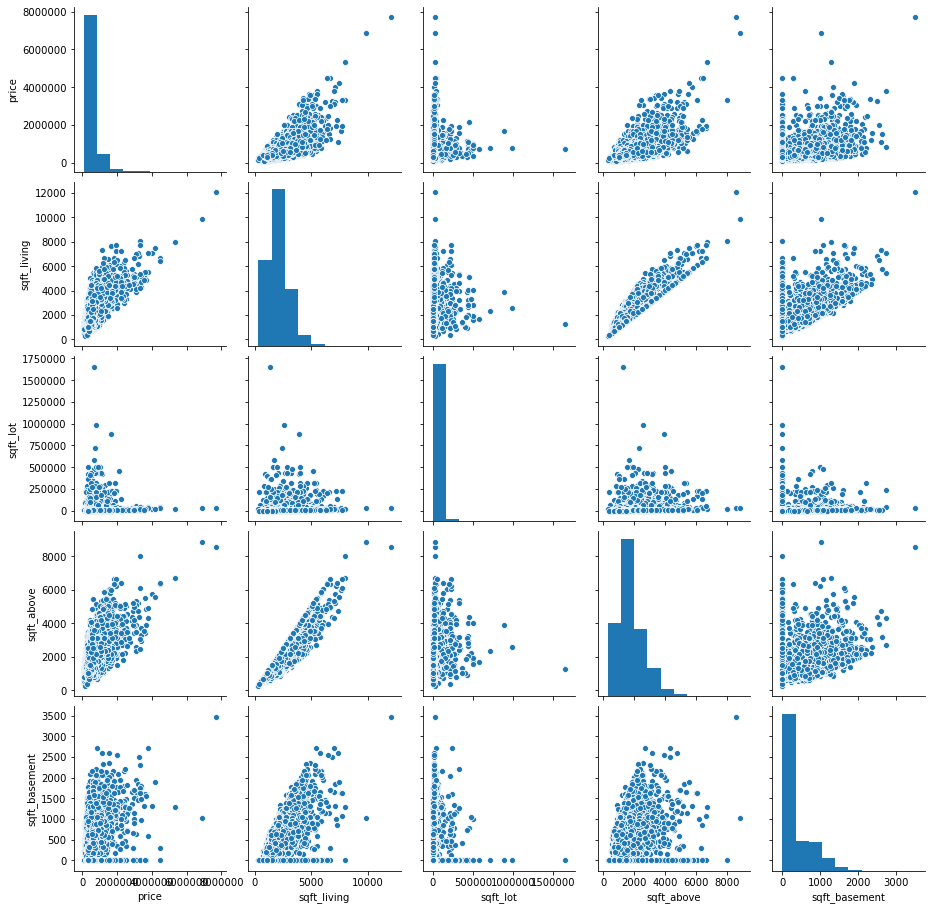

In [109]:
sns.pairplot(house_train_data.loc[:,['price','sqft_living','sqft_lot','sqft_above','sqft_basement']]);

### Analysing correlation among target variables and other continious attributes present

In [104]:
house_train_data.loc[:,['price','sqft_living','sqft_lot','sqft_above','sqft_basement']].corr()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement
price,1.000000,0.705052,0.094143,0.611453,0.322383
sqft_living,0.705052,1.000000,0.162786,0.878989,0.435069
sqft_lot,0.094143,0.162786,1.000000,0.180913,-0.000601
sqft_above,0.611453,0.878989,0.180913,1.000000,-0.046926
sqft_basement,0.322383,0.435069,-0.000601,-0.046926,1.000000


<b> Observation : </b> <br>

1) Correlation with Target Variable(Price)
   * Attributes with strong co-relation (mod value > 0.5 ) :- sqft_living, sqft_above, sqft_living15 <br>
   * Attributes with medium co-relation (mod value < 0.5 && mod value > 0.1 ) :- sqft_basement <br>
   * Attributes with low co-relation (value close to zero) :- sqft_lot, sqft_lot15 <br>
   
2) Attributes with very high corelation among themselves:
   * sqft_living with sqft_above
   * sqft_living with sqft_basement
   * sqft_living with sqft_living15

Note: The three attibutes that have strong correlation with Price, is hightly correlated among themselves. All three should not be used in building linear model as they will lead to multicolinearity.

### Analysing correlation amoung target variables and numberical categorical attributes present

In [73]:
house_train_data.loc[:,['price','bedrooms','bathrooms','floors','waterfront','view','condition','grade']].corr()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade
price,1.000000,0.300902,0.528453,0.262735,0.275410,0.399258,0.042991,0.665169
bedrooms,0.300902,1.000000,0.505762,0.180522,-0.006810,0.079599,0.035761,0.343472
bathrooms,0.528453,0.505762,1.000000,0.502140,0.061591,0.183252,-0.116809,0.662150
floors,0.262735,0.180522,0.502140,1.000000,0.022362,0.031757,-0.266425,0.461762
waterfront,0.275410,-0.006810,0.061591,0.022362,1.000000,0.403496,0.024019,0.088039
view,0.399258,0.079599,0.183252,0.031757,0.403496,1.000000,0.058367,0.257397
condition,0.042991,0.035761,-0.116809,-0.266425,0.024019,0.058367,1.000000,-0.135764
grade,0.665169,0.343472,0.662150,0.461762,0.088039,0.257397,-0.135764,1.000000


<b> Observations : </b> <br>

1) Correlation with Target Variable (Price)
   * Attributes with strong co-relation (mod value > 0.5 ) :- bathrooms,grade <br>
   * Attributes with medium co-relation (mod value < 0.5 && mod value > 0.1 ) :- bedrooms,floors,waterfront,view  <br>
   * Attributes with low co-relation (value close to zero) :- condition  <br>
   
2) Attributes with corelation among themselves:
   * bathrooms and grades are highly colinear
   
   * grades are colinear with bedrooms, bathrooms, floors
   * bathrooms are colinear with bedrooms, floors
   
   * View and waterfront are moderately colinear

Note: 
   * floors and bedrooms attributes cannot be used as they are colinear with both bathrooms and grade which have high colinearity with price
   * View and waterfront cannot be used together

Scatter plot between price and sqft_living

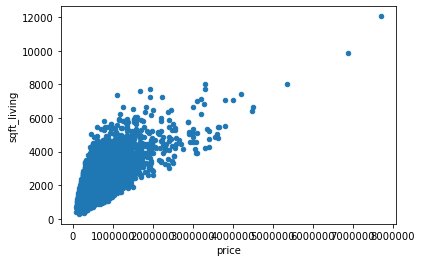

In [74]:
house_train_data.plot(kind='scatter', x= 'price', y = 'sqft_living'); # Corelation value = 0.705052

## Understanding the attribute

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
# Common method to build Linear Regression model based on various changes in train, test or validation data
# Returns tuple (RMSE, R2)
def RMSE_R2_Linear_Regression(trainingData, testingData,predictorList, trainingTarget, ifLog):
    X_train = trainingData.loc[:,predictorList]
    y_train = trainingData[trainingTarget]

    X_test = testingData.loc[:,predictorList]
    y_test = testingData[trainingTarget]
    
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = 0.0
    r2score = 0.0
    if ifLog == True:
        rmse = np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred)))
        r2score = r2_score(np.exp(y_test),np.exp(y_pred))
    else:
        rmse = np.sqrt(mean_squared_error(y_test,y_pred))
        r2score = r2_score(y_test,y_pred)
    
    return (rmse,r2score)

In [25]:
# Linear Model only with the continious variables of the given data
print('Model 1 :- Contains only continious variables, which has high corelation with price and less colinearity with other attributes')
print("Selected Attributes: sqft_living")
print('Training Data: RMSE & R2 Value :',RMSE_R2_Linear_Regression(house_train_data, house_train_data,['sqft_living'],'price', False))

Model 1 :- Contains only continious variables, which has high corelation with price and less colinearity with other attributes
Selected Attributes: sqft_living
Training Data: RMSE & R2 Value : (269129.01665424305, 0.49704565008609436)


In [26]:
# Linear Model only with only numerical categorical variables of the given data
print('Model 2 :- Contains only categorical numberical variables which have high colinearity wth price and no colinearity with other attributes')
print("Selected Attributes: grade, view")
print('Training Data: RMSE & R2 Value :',RMSE_R2_Linear_Regression(house_train_data, house_train_data,['grade','view'],'price',False))

Model 2 :- Contains only categorical numberical variables which have high colinearity wth price and no colinearity with other attributes
Selected Attributes: grade, view
Training Data: RMSE & R2 Value : (268834.8278393432, 0.4981446224335938)


### Finding correlation between sqft_living, grade ,view and price

In [178]:
house_train_data[['sqft_living','grade' ,'view','price']].corr()

,sqft_living,grade,view,price
sqft_living,1.000000,0.765128,0.285206,0.705015
grade,0.765128,1.000000,0.257397,0.665169
view,0.285206,0.257397,1.000000,0.399258
price,0.705015,0.665169,0.399258,1.000000


<b> Observation: </b> <br>
grade and sqft_living are highly colinear with price and also colinear with each other. So, they cannot be used together.

In [27]:
print('Model 3 :- Model with sqft_living and view')
print('Training Data: RMSE & R2 Value :',RMSE_R2_Linear_Regression(house_train_data, house_train_data,['sqft_living','view'],'price',False))

Model 3 :- Model with sqft_living and view
Training Data: RMSE & R2 Value : (257436.03884603773, 0.5398004304238639)


<b> Observation: </b> <br>
Model 2: Attributes : sqft_living and view <br>
Model 3: grade and view <br>

* Model 3 performs better with training data. 
* From attributes bedrooms, bathrooms, sqft_living, sqft_lot, floors, watefront, view, condition, grade, sqft_above, sqt_basement, sqft_living15, sqft_lot15 only (sqft_living,view) and (grade, view) are chosen to build the model. And further imporovement will be based on these two models.
 

### Creating new Features from the existing ones

In [28]:
# building_age - Derived from yr_built, provides us a continious attribute which repesents the age of the building at the 
#time when entry was made
#house_train_data['building_age'] = datetime.datetime.now().year - house_train_data['yr_built'] 
house_train_data['building_age'] = house_train_data['date'].dt.year - house_train_data['yr_built'] 

In [29]:
# Deriving a binary varaiable if_yr_renovated from categorical variable yr_renovated. 
# 0 - building is not renovated and 1 for building is renovated
house_train_data['if_yr_renovated'] = house_train_data['yr_renovated'].apply(lambda x : 0 if(x !=0) else 1 )

In [30]:
house_train_data['if_sqft_basement'] = house_train_data['sqft_basement'].apply(lambda x: 0 if (x ==0) else 1)

In [31]:
house_train_data[['price','sqft_living','view','grade','building_age','if_yr_renovated','if_sqft_basement']]

,price,sqft_living,view,grade,building_age,if_yr_renovated,if_sqft_basement
0,367500.0,3110,0,8,17,1,0
1,499950.0,2860,0,8,10,1,1
2,437500.0,1970,0,9,37,1,0
3,750000.0,2390,2,8,59,1,1
4,785000.0,3660,2,10,8,1,0
...,...,...,...,...,...,...,...
9715,479349.0,3223,0,9,1,1,0
9716,359000.0,1370,0,8,6,1,1
9717,183000.0,1170,0,7,53,1,0
9718,450000.0,1870,0,7,55,1,0


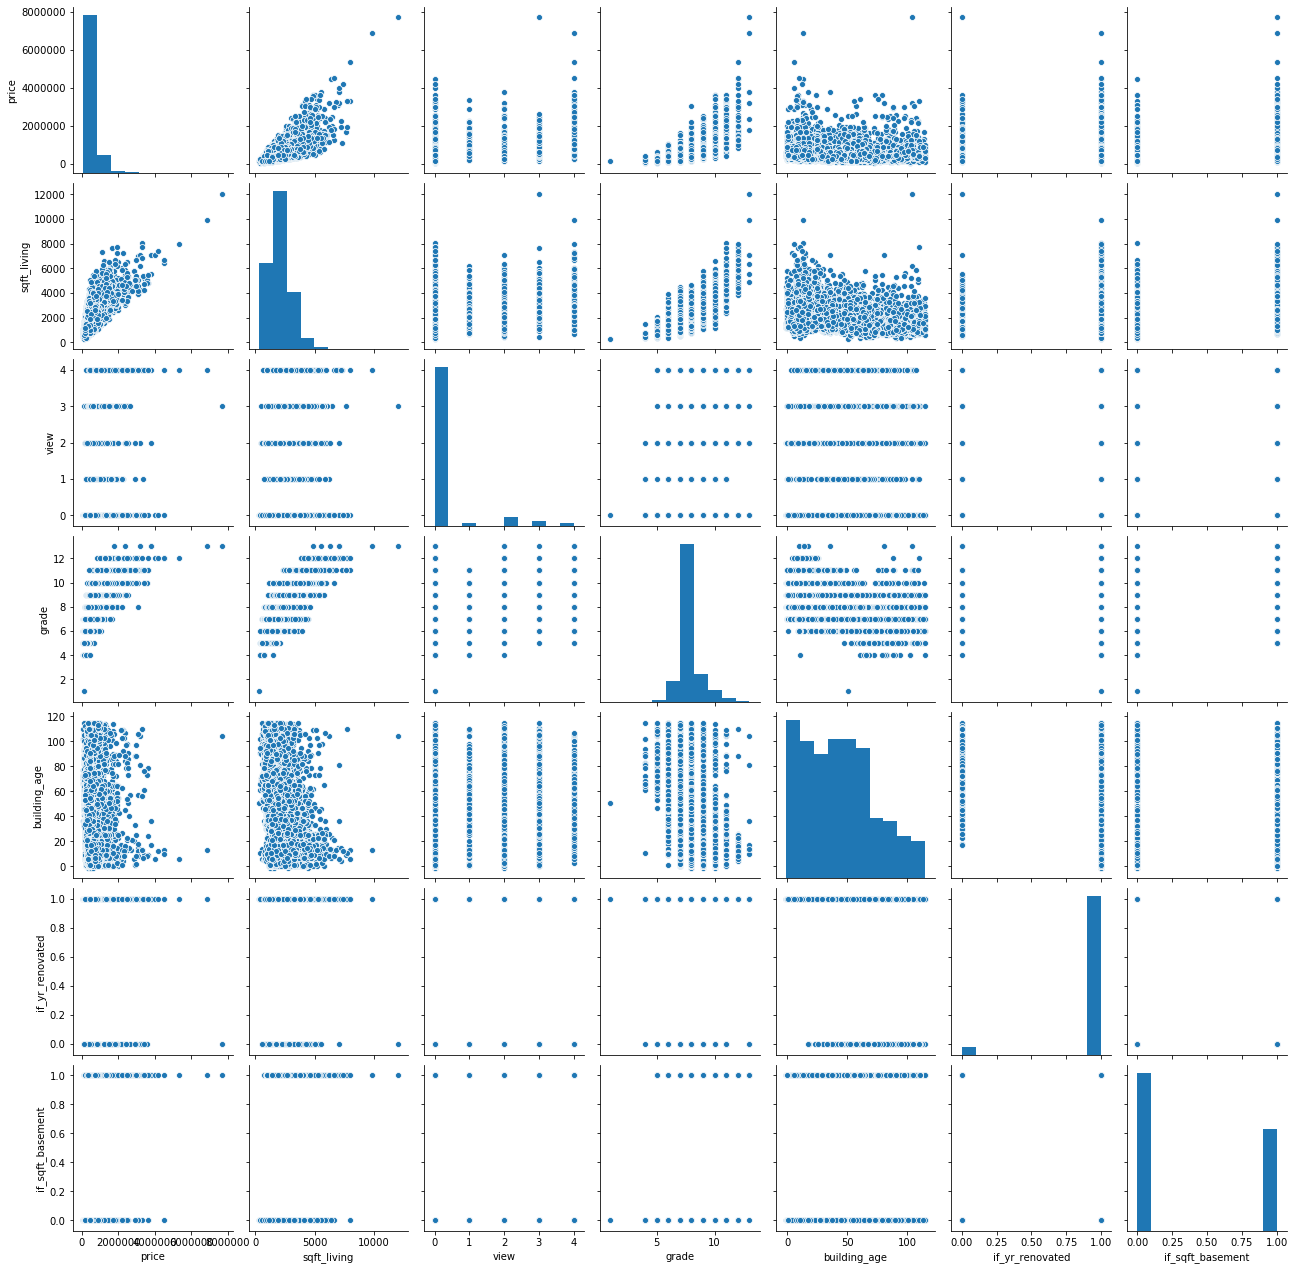

In [136]:
sns.pairplot(house_train_data[['price','sqft_living','view','grade','building_age','if_yr_renovated','if_sqft_basement']]);

In [137]:
house_train_data[['price','sqft_living','view','grade','building_age','if_yr_renovated','if_sqft_basement']].corr()

,price,sqft_living,view,grade,building_age,if_yr_renovated,if_sqft_basement
price,1.000000,0.705015,0.399258,0.665169,-0.050854,-0.120068,0.186383
sqft_living,0.705015,1.000000,0.285206,0.765128,-0.323103,-0.043037,0.216794
view,0.399258,0.285206,1.000000,0.257397,0.056687,-0.108328,0.181918
grade,0.665169,0.765128,0.257397,1.000000,-0.447756,-0.012051,0.058443
building_age,-0.050854,-0.323103,0.056687,-0.447756,1.000000,-0.228805,0.164411
if_yr_renovated,-0.120068,-0.043037,-0.108328,-0.012051,-0.228805,1.000000,-0.049332
if_sqft_basement,0.186383,0.216794,0.181918,0.058443,0.164411,-0.049332,1.000000


<b>Observation: </b>
* None of the newly created attribute seem to have any linear corelation with our Target Variable.

In [32]:
# Creating one hot encoding for all the zipcodes
zipcode_dummies = pd.get_dummies(house_train_data['zipcode'], prefix='zipcode')
house_train_data = pd.concat([house_train_data,zipcode_dummies],axis =1).drop(['zipcode'],axis=1)

In [33]:
cols = house_train_data.drop(['id','sqft_living','date','price','sqft_above','bedrooms','bathrooms','sqft_lot','floors','waterfront','condition','sqft_basement','yr_built','yr_renovated','sqft_living15','lat','long','if_yr_renovated','sqft_lot15','building_age','if_sqft_basement'], axis=1).columns.to_list()
print('Model 4 :- Model with grade, view and one hot encoded zipcode')
print('Training Data: RMSE & R2 Value :',RMSE_R2_Linear_Regression(house_train_data, house_train_data,cols,'price',False))

Model 4 :- Model with grade, view and one hot encoded zipcode
Training Data: RMSE & R2 Value : (210551.59097362953, 0.6921603374855275)


In [34]:
cols = house_train_data.drop(['id','grade','date','price','sqft_above','bedrooms','bathrooms','sqft_lot','floors','waterfront','condition','sqft_basement','yr_built','yr_renovated','sqft_living15','lat','long','if_yr_renovated','sqft_lot15','building_age','if_sqft_basement'], axis=1).columns.to_list()
print('Model 5 :- Model with sqft_living, view and one hot encoded zipcode')
print('Training Data: RMSE & R2 Value :',RMSE_R2_Linear_Regression(house_train_data, house_train_data,cols,'price',False))

Model 5 :- Model with sqft_living, view and one hot encoded zipcode
Training Data: RMSE & R2 Value : (186159.0491841825, 0.7593555645720292)


<b> Observation: </b> <br>
Model 5 (Model with sqft_living, view and one hot encoded zipcode) is considered to have the least RMSE value of 186159 and highest R2 value of 0.75 in the training data set

In [35]:
# There are couple of changes made to the training dataset. The same changes are expected in validation data and test data.
# The transformation on the dataset that are applicabe to train, validation and test data
def transforming_dataframe(dataset):
    # Removing id duplicates.
    remove_duplicate_id_values(dataset)
    
    # Creating a new continious attribute age of the building using the yr_built attribute
    dataset['building_age'] = datetime.datetime.now().year - dataset['yr_built'] 
    
    # Converting the yr_renovated to a binary variable. 1 for house renovated and 0 for house not being renovated
    dataset['if_yr_renovated'] = dataset['yr_renovated'].apply(lambda x : 0 if(x !=0) else 1 )
    
    # Converting sqft_basement to if the building contains basement or not
    dataset['if_sqft_basement'] = dataset['sqft_basement'].apply(lambda x: 0 if (x ==0) else 1)
    
    dataset['price_log'] = np.log(dataset['price'])
    dataset['sqft_living_log'] = np.log(dataset['sqft_living'])
    
    # Creating one hot encoding for all the zipcodes
    zipcode_dummies = pd.get_dummies(dataset['zipcode'], prefix='zipcode')
    dataset = pd.concat([dataset,zipcode_dummies],axis =1)
    return dataset

In [36]:
cols = house_train_data.drop(['id','grade','date','price','sqft_above','bedrooms','bathrooms','sqft_lot','floors','waterfront','condition','sqft_basement','yr_built','yr_renovated','sqft_living15','lat','long','if_yr_renovated','sqft_lot15','building_age','if_sqft_basement'], axis=1).columns.to_list()
print('Model 5 :- Model with sqft_living, view and one hot encoded zipcode')
house_validation_data = transforming_dataframe(pd.read_csv(os.path.join(data_loc,'wk3_kc_house_valid_data.csv')))
print('Validation Data: RMSE & R2 Value :',RMSE_R2_Linear_Regression(house_train_data, house_validation_data,cols,'price',False))

Model 5 :- Model with sqft_living, view and one hot encoded zipcode
Validation Data: RMSE & R2 Value : (175045.93112039423, 0.7585969462337913)


Trying all possible combinations to just increase the R2 value

In [255]:
cols = house_train_data.drop(['id','date','price','sqft_above','bedrooms','bathrooms','sqft_lot','floors','condition','sqft_basement','yr_built','yr_renovated','sqft_living15','lat','long','if_yr_renovated','sqft_lot15','building_age','if_sqft_basement'], axis=1).columns.to_list()
print('Model 6 :- Model with sqft_living, view and one hot encoded zipcode, grade and waterfront')
print('Training Data: RMSE & R2 Value :',RMSE_R2_Linear_Regression(house_train_data, house_train_data,cols,'price',False))
house_validation_data = transforming_dataframe(pd.read_csv(os.path.join(data_loc,'wk3_kc_house_valid_data.csv')))
print('Validation Data: RMSE & R2 Value :',RMSE_R2_Linear_Regression(house_train_data, house_validation_data,cols,'price',False))

Model 5 :- Model with sqft_living, view and one hot encoded zipcode, grade and waterfront
Training Data: RMSE & R2 Value : (172957.29644686214, 0.7922766606975076)
Validation Data: RMSE & R2 Value : (162966.0792947172, 0.7907655683087216)


<b> Observation: </b> <br>
R2 value improved on inclusion of grade and waterfront. It does not increase any further with inclusion of any other variables

### Creating new features - log transformation of the features

In [256]:
house_train_data['price_log'] = np.log(house_train_data['price'])
house_train_data['sqft_living_log'] = np.log(house_train_data['sqft_living'])

In [264]:
cols = house_train_data.drop(['id','date','price','price_log','condition','sqft_above','sqft_living','bedrooms','bathrooms','sqft_lot','floors','sqft_basement','yr_built','yr_renovated','sqft_living15','lat','long','if_yr_renovated','sqft_lot15','building_age','if_sqft_basement'], axis=1).columns.to_list()
print('Model 7 :- Model with sqft_living_log, view , one hot encoded zipcode, grade and waterfront')
print('Training Data: RMSE & R2 Value :',RMSE_R2_Linear_Regression(house_train_data, house_train_data,cols,'price_log',True))
house_validation_data = transforming_dataframe(pd.read_csv(os.path.join(data_loc,'wk3_kc_house_valid_data.csv')))
print('Validation Data: RMSE & R2 Value :',RMSE_R2_Linear_Regression(house_train_data, house_validation_data,cols,'price_log',True))

Model 7 :- Model with sqft_living_log, view , one hot encoded zipcode, grade and waterfront
Training Data: RMSE & R2 Value : (143681.07410003248, 0.8566470444551365)
Validation Data: RMSE & R2 Value : (129510.61977664792, 0.8678553811371654)


<b> Observation:  </b> <br>
    On convertion of sqft_living to its log transform, the R2 value and RMSE value is also redused

In [266]:
house_test_data = transforming_dataframe(pd.read_csv(os.path.join(data_loc,'wk3_kc_house_test_data.csv')))
print('Test Data: RMSE & R2 Value :',RMSE_R2_Linear_Regression(house_train_data, house_test_data,cols,'price_log', True))

Test Data: RMSE & R2 Value : (132303.46780568737, 0.863683494904541)


<b>The best model is built with attributes sqft_living, view, one hot enceded zip code, grade and waterfront </b> <br>
<b> Results : </b> <br>
<b>Training Data   :</b> R2: 85%,  RMSE: 143681 <br>
<b>Validation Data :</b> R2: 86%,  RMSE: 129510 <br>
<b>Test Data       :</b> R2: 86%,  RMSE: 132303 <br>